# Kernel Approximation using random features

In [1]:
from torchkernels.feature_maps import LaplacianORF, LaplacianRFF
from torchkernels.kernels.radial import laplacian
from utils import plot_kernel_approximation
import numpy as np
import torch

In [2]:
d = 32
p = int(3e4)

Create radomly oriented vectors $x_1$ and $x_2$ that are a specified distance apart

In [3]:
N = 20
x1_x2_norm = np.linspace(0, 5, N)
x1_list = []
x2_list = []
for i, x_ in enumerate(x1_x2_norm):
    x1 = torch.randn(d)
    x1_x2_u = torch.randn(d)
    x1_x2 = x1_x2_u/np.linalg.norm(x1_x2_u)*x_
    x2 = x1 + x1_x2
    x1 = x1.reshape(1,-1)
    x2 = x2.reshape(1,-1)
    x1_list.append(x1)
    x2_list.append(x2)

Evaluate exactly $K(x_1, x_2)$

In [4]:
K_exact_list = []
for x1,x2 in zip(x1_list, x2_list):
    K_exact_list.append(laplacian(x1, x2)[0].item())

### Define random feature map (ORF)

In [5]:
p = int(3e4)
feature_map = LaplacianORF(input_dim=d, num_features=p)

In [6]:
#ORF
K_approx_list_ORF = []
for x1,x2 in zip(x1_list, x2_list):
    Phi_x1 = feature_map(x1)
    Phi_x2 = feature_map(x2)
    K_approx_list_ORF.append((Phi_x1@Phi_x2.T)[0].item())

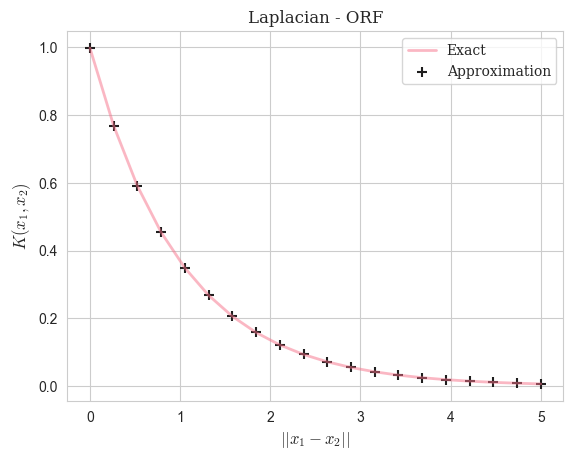

In [7]:
plot_kernel_approximation(x1_x2_norm, K_exact_list, K_approx_list_ORF, kernel_str='Laplacian - ORF')

### Define random feature map (RFF)

In [8]:
p = int(3e4)
feature_map = LaplacianRFF(input_dim=d, num_features=p)

In [9]:
#RFF
K_approx_list_ORF = []
for x1,x2 in zip(x1_list, x2_list):
    Phi_x1 = feature_map(x1)
    Phi_x2 = feature_map(x2)
    K_approx_list_ORF.append((Phi_x1@Phi_x2.T)[0].item())

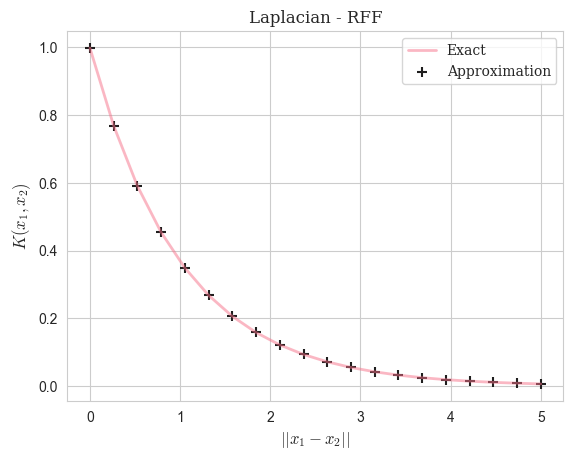

In [10]:
plot_kernel_approximation(x1_x2_norm, K_exact_list, K_approx_list_ORF, kernel_str='Laplacian - RFF')